# MNIST

In [48]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## MLP

In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Dataset Loading and EDA

In [50]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Count unique training dataset label
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# Count unique test dataset label
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [51]:
# Extract Training Dataset Randomly
indexes = np.random.randint(0, x_train.shape[0], size=9)
images = x_train[indexes]
labels = y_train[indexes]

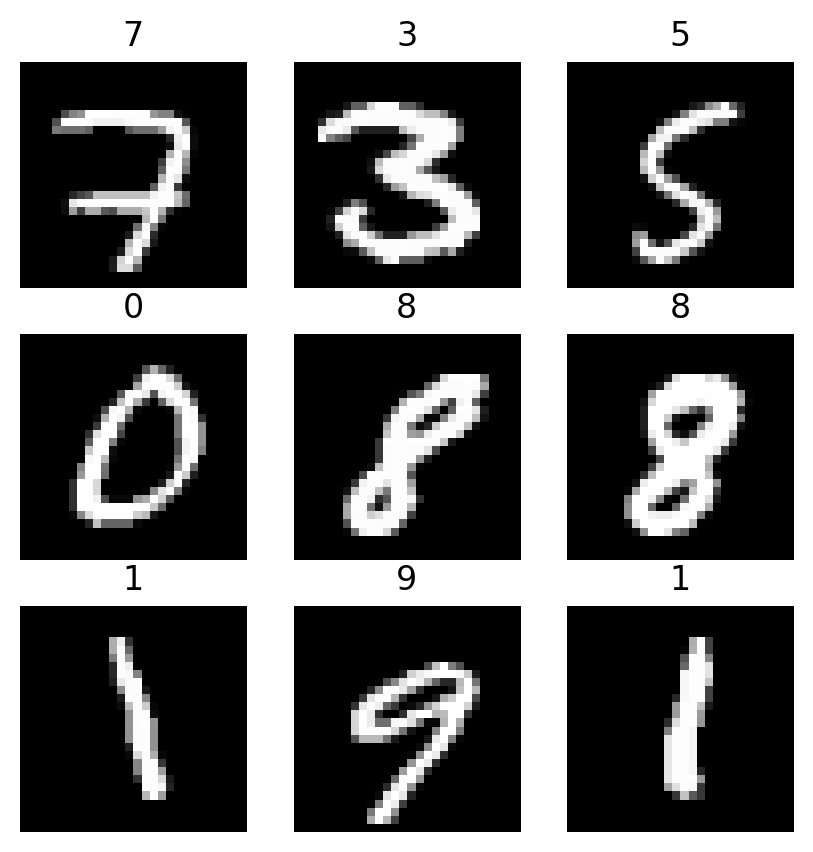

In [52]:
# Draw 9 MNIST dataset
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(3,3, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(y_train[indexes[i]])
plt.show()

### Modeling

In [53]:
from keras.layers import Flatten, Dense, Dropout

In [54]:
# Count the number of labels
num_labels = len(np.unique(y_train))

# One-Hot Encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Image Dimension
image_size = x_train.shape[1] # (60000, 28, 28)
input_size = (image_size, image_size)

# Normalize
x_train = x_train.astype('float32')/255 # Normalize
x_test = x_test.astype('float32')/255 # Normalize

# NN Parameters
batch_size = 128
hidden_units = 256
dropout = .45

# Build-up Sequential API Model
def create_seq_model():
    model = keras.Sequential()
    model.add(Flatten(input_shape = input_size))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_labels, activation='softmax'))
    return model

seq_model = create_seq_model()
seq_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-tr

In [55]:
seq_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                 )

In [56]:
seq_model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
  6/469 [..............................] - ETA: 4s - loss: 2.1899 - accuracy: 0.2214  

2023-01-26 19:27:10.818491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 7ms/step - loss: 0.3990 - accuracy: 0.8792
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1762 - accuracy: 0.9472
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1321 - accuracy: 0.9592
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1126 - accuracy: 0.9665
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0972 - accuracy: 0.9694
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0890 - accuracy: 0.9724
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0811 - accuracy: 0.9743
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0747 - accuracy: 0.9765
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0684 - accuracy: 0.9784
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0664 - accuracy: 0.9784
Epoch 11/2

In [57]:
loss, acc = seq_model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test accuracy: {(100*acc):>.1f}%")

31/79 [==========>...................] - ETA: 0s - loss: 0.0893 - accuracy: 0.9758

2023-01-26 19:28:13.361962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 0s 5ms/step - loss: 0.0622 - accuracy: 0.9833
Test accuracy: 98.3%
